<a href="https://colab.research.google.com/github/haripranesh1505/Speech-Emotion-Recognization/blob/main/Speech_Emotion_Recongnization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Speech Emotion Recongnization

Hari Pranesh M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import soundfile
import numpy as np
import librosa
import glob
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}


In [ ]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [ ]:
def load_data(test_size=0.2):
    X, y = [], []
    try :
      for file in glob.glob("/content/drive/My Drive/DataSets/audio_speech_actors_01-24/Actor_*/*.wav"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])
    except :
         pass
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [ ]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)
print("[+] Number of training samples:", X_train.shape[0])
print("[+] Number of testing samples:", X_test.shape[0])

03-01-05-02-02-02-01.wav
03-01-02-02-02-01-01.wav
03-01-03-01-01-01-01.wav
03-01-03-02-01-01-01.wav
03-01-02-01-01-02-01.wav
03-01-06-01-01-02-01.wav
03-01-01-01-01-02-01.wav
03-01-01-01-02-01-01.wav
03-01-04-01-01-01-01.wav
03-01-04-01-02-01-01.wav
03-01-04-02-02-02-01.wav
03-01-02-02-01-01-01.wav
03-01-02-02-02-02-01.wav
03-01-02-01-01-01-01.wav
03-01-03-01-01-02-01.wav
03-01-03-01-02-01-01.wav
03-01-01-01-01-01-01.wav
03-01-05-01-01-01-01.wav
03-01-04-02-02-01-01.wav
03-01-03-02-02-01-01.wav
03-01-01-01-02-02-01.wav
03-01-05-02-01-01-01.wav
03-01-04-01-02-02-01.wav
03-01-05-02-02-01-01.wav
03-01-02-01-02-01-01.wav
03-01-04-01-01-02-01.wav
03-01-03-02-01-02-01.wav
03-01-05-01-02-01-01.wav
03-01-02-01-02-02-01.wav
03-01-03-01-02-02-01.wav
03-01-04-02-01-01-01.wav
03-01-03-02-02-02-01.wav
03-01-02-02-01-02-01.wav
03-01-05-02-01-02-01.wav
03-01-05-01-01-02-01.wav
03-01-04-02-01-02-01.wav
03-01-05-01-02-02-01.wav
03-01-06-01-01-01-01.wav
03-01-08-01-01-02-01.wav
03-01-08-01-02-01-01.wav


In [ ]:
import numpy as np
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((504, 180), (504,), (168, 180), (168,))

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape,x_testcnn.shape

((504, 180, 1), (168, 180, 1))

In [ ]:
print("[+] Number of training samples:", X_train.shape[0])
print("[+] Number of testing samples:", X_test.shape[0])
print("[+] Number of features:", X_train.shape[1])

[+] Number of training samples: 504
[+] Number of testing samples: 168
[+] Number of features: 180


# ***FIRST MODEL***

Two Relu and one Softmax

Sparse Categorial CrossEntropy

In [ ]:
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))



model.add(Conv1D(128, 5,padding='same',))                           #2
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                 #3
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_27 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_20 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_28 (Activation)  (None, 22, 128)           0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=25, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 3.9304 - accuracy: 0.2282 - val_loss: 1.6614 - val_accuracy: 0.3333
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 2.6673 - accuracy: 0.2877 - val_loss: 1.2981 - val_accuracy: 0.3750
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 2.4248 - accuracy: 0.3234 - val_loss: 1.5708 - val_accuracy: 0.2381
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 2.4349 - accuracy: 0.3254 - val_loss: 1.4823 - val_accuracy: 0.3512
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 2.3001 - accuracy: 0.3254 - val_loss: 1.7897 - val_accuracy: 0.3333
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 2.0880 - accuracy: 0.3492 - val_loss: 1.1905 - val_accuracy: 0.4286
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 2.1940 - accuracy: 0.3373 - val_loss: 1.6466 - val_accuracy: 0.3512
Epoch 8/100


In [ ]:
em=['happy','sad','neutral','angry']

In [ ]:
predict_x=model.predict(x_testcnn)
classes_x=np.argmax(predict_x,axis=1)
n=classes_x[1]
print(em)

['happy', 'sad', 'neutral', 'angry']


In [ ]:
loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

6/6 [==============================] - 0s 3ms/step - loss: 0.9143 - accuracy: 0.5714
Restored model, accuracy: 57.14%


#  Testing 1

In [ ]:
filename = "/content/drive/My Drive/DataSets/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav"
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
f=np.expand_dims(features,axis=2)
predict_x=model.predict(f)
classes_x=np.argmax(predict_x,axis=1)
result=int(classes_x)-1
print("result :",em[result])

result : happy


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
predict_x=model.predict(x_testcnn)
classes_x=np.argmax(predict_x,axis=1)
#print(classification_report(y_test,classes_x))
#print(confusion_matrix(y_test,classes_x))
print ('Accuracy:', accuracy_score(y_test, classes_x))
print ('F1 score:', f1_score(y_test, classes_x,average='weighted'))
print ('Recall:', recall_score(y_test, classes_x,average='weighted'))
print ('Precision:', precision_score(y_test, classes_x,average='weighted'))
print ('\n classification report:\n', classification_report(y_test, classes_x))
print ('\n confussion matrix:\n',confusion_matrix(y_test, classes_x))

Accuracy: 0.5714285714285714
F1 score: 0.5813718720199927
Recall: 0.5714285714285714
Precision: 0.6220472524849538

 classification report:
               precision    recall  f1-score   support

         0.0       0.60      0.65      0.62        52
         1.0       0.47      0.52      0.49        44
         3.0       0.37      0.55      0.44        20
         4.0       0.88      0.54      0.67        52

    accuracy                           0.57       168
   macro avg       0.58      0.57      0.56       168
weighted avg       0.62      0.57      0.58       168


 confussion matrix:
 [[34 11  4  3]
 [ 7 23 13  1]
 [ 0  9 11  0]
 [16  6  2 28]]


In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
res = perf_measure(y_test, classes_x)
print("TP",res[0])
print("FP",res[1])
print("TN",res[2])
print("FP",res[3])


TP 23
FP 26
TN 34
FP 23


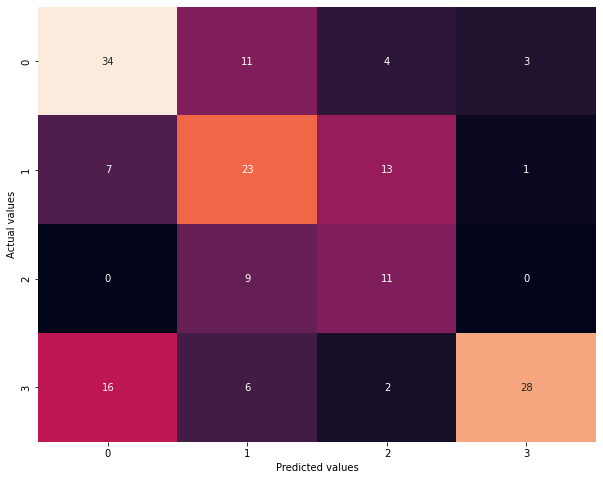

In [ ]:
import seaborn as sns
import pandas as pd
cm1 = pd.DataFrame(confusion_matrix(y_test, classes_x))
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

# ***SECOND MODEL***

Three Relu and one Softmax (Dropout = 0.25)

Sparse categorial Crossentropy 

In [ ]:
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

um = Sequential()

um.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
um.add(Activation('relu'))
um.add(Dropout(0.25))
um.add(MaxPooling1D(pool_size=(8)))

um.add(Conv1D(128, 5,padding='same',))                  #2
um.add(Activation('relu'))
um.add(MaxPooling1D(pool_size=(8)))
um.add(Dropout(0.25))

um.add(Conv1D(128, 5,padding='same',))                  #3
um.add(Activation('relu'))
um.add(Dropout(0.25))

um.add(Flatten())
um.add(Dense(8))                                        #4                      
um.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)

In [ ]:
um.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_30 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_22 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_31 (Activation)  (None, 22, 128)           0         
                                                      

In [ ]:
um.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
umhistory=um.fit(x_traincnn, y_train, batch_size=25, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 9.9807 - accuracy: 0.1825 - val_loss: 1.7114 - val_accuracy: 0.3214
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 6.8567 - accuracy: 0.2937 - val_loss: 2.2266 - val_accuracy: 0.2976
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 6.5110 - accuracy: 0.2460 - val_loss: 1.4010 - val_accuracy: 0.3274
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 5.6552 - accuracy: 0.3075 - val_loss: 1.7652 - val_accuracy: 0.2381
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 5.3529 - accuracy: 0.2937 - val_loss: 1.5359 - val_accuracy: 0.4048
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 4.9154 - accuracy: 0.2976 - val_loss: 1.3521 - val_accuracy: 0.3631
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 4.5932 - accuracy: 0.3075 - val_loss: 2.0122 - val_accuracy: 0.3393
Epoch 8/100


In [ ]:
loss, acc = um.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

6/6 [==============================] - 0s 3ms/step - loss: 1.1798 - accuracy: 0.6012
Restored model, accuracy: 60.12%


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
predict=um.predict(x_testcnn)
classes=np.argmax(predict,axis=1)
#print(classification_report(y_test,classes))
#print(confusion_matrix(y_test,classes))
print ('Accuracy:', accuracy_score(y_test, classes))
print ('F1 score:', f1_score(y_test, classes,average='weighted'))
print ('Recall:', recall_score(y_test, classes,average='weighted'))
print ('Precision:', precision_score(y_test, classes,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, classes))
print ('\n confussion matrix:\n',confusion_matrix(y_test, classes))

Accuracy: 0.6011904761904762
F1 score: 0.5683137292592346
Recall: 0.6011904761904762
Precision: 0.556192235910205

 clasification report:
               precision    recall  f1-score   support

         0.0       0.59      0.63      0.61        52
         1.0       0.49      0.77      0.60        44
         3.0       0.00      0.00      0.00        20
         4.0       0.79      0.65      0.72        52

    accuracy                           0.60       168
   macro avg       0.47      0.52      0.48       168
weighted avg       0.56      0.60      0.57       168


 confussion matrix:
 [[33 12  0  7]
 [ 8 34  0  2]
 [ 2 18  0  0]
 [13  5  0 34]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
res = perf_measure(y_test, classes)
print("TP",res[0])
print("FP",res[1])
print("TN",res[2])
print("FP",res[3])


TP 34
FP 35
TN 33
FP 23


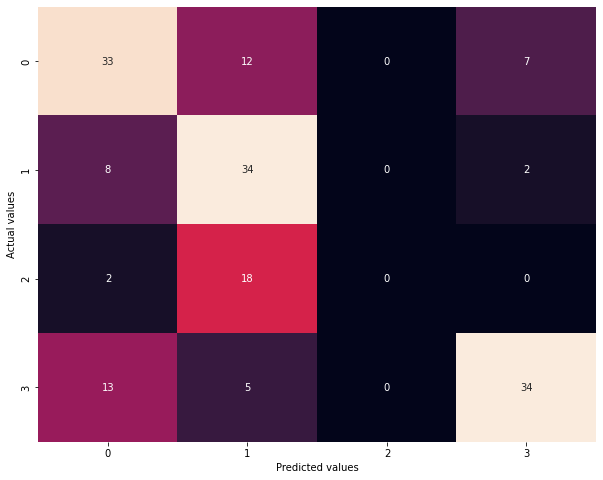

In [ ]:
import seaborn as sns
import pandas as pd
cm2 = pd.DataFrame(confusion_matrix(y_test, classes))
plt.figure(figsize = (10, 8))
sns.heatmap(cm2, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
filename = "/content/drive/My Drive/DataSets/audio_speech_actors_01-24/Actor_15/03-01-04-02-01-02-15.wav"
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
f=np.expand_dims(features,axis=2)
predict=um.predict(f)
classes=np.argmax(predict,axis=1)
result=int(classes)
print("result :",em[result])

result : sad


# ***THIRD MODEL***

Three Relu and one Softmax (Dropout=0.1)

Sparse Categorial CrossEntropy


In [ ]:
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

tm = Sequential()

tm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
tm.add(Activation('relu'))
tm.add(Dropout(0.1))
tm.add(MaxPooling1D(pool_size=(8)))

tm.add(Conv1D(128, 5,padding='same',))                  #2
tm.add(Activation('relu'))
tm.add(MaxPooling1D(pool_size=(8)))
tm.add(Dropout(0.1))

tm.add(Conv1D(128, 5,padding='same',))                  #3
tm.add(Activation('relu'))
tm.add(Dropout(0.1))

tm.add(Flatten())
tm.add(Dense(8))                                        #4                      
tm.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)



In [ ]:
tm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_34 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_25 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_35 (Activation)  (None, 22, 128)           0         
                                                      

In [ ]:
tm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
tmhistory=tm.fit(x_traincnn, y_train, batch_size=25, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 4.5623 - accuracy: 0.2560 - val_loss: 1.4256 - val_accuracy: 0.3214
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 3.2338 - accuracy: 0.3155 - val_loss: 1.4412 - val_accuracy: 0.3214
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 3.3634 - accuracy: 0.2956 - val_loss: 1.4846 - val_accuracy: 0.3333
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 3.1970 - accuracy: 0.3155 - val_loss: 1.4886 - val_accuracy: 0.4524
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 3.0426 - accuracy: 0.2599 - val_loss: 1.4263 - val_accuracy: 0.3571
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 2.6806 - accuracy: 0.3472 - val_loss: 1.3290 - val_accuracy: 0.3988
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 2.4543 - accuracy: 0.3492 - val_loss: 1.3112 - val_accuracy: 0.3333
Epoch 8/100


In [ ]:
loss, acc = tm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

6/6 [==============================] - 0s 3ms/step - loss: 0.9788 - accuracy: 0.5536
Restored model, accuracy: 55.36%


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [ ]:
pred=tm.predict(x_testcnn)
clas=np.argmax(pred,axis=1)
#print(classification_report(y_test,clas))
#print(confusion_matrix(y_test,clas))
print ('Accuracy:', accuracy_score(y_test, clas))
print ('F1 score:', f1_score(y_test, clas,average='weighted'))
print ('Recall:', recall_score(y_test, clas,average='weighted'))
print ('Precision:', precision_score(y_test, clas,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, clas))
print ('\n confussion matrix:\n',confusion_matrix(y_test, clas))

Accuracy: 0.5535714285714286
F1 score: 0.5531394166862147
Recall: 0.5535714285714286
Precision: 0.572387643582023

 clasification report:
               precision    recall  f1-score   support

         0.0       0.63      0.42      0.51        52
         1.0       0.44      0.61      0.51        44
         3.0       0.40      0.40      0.40        20
         4.0       0.69      0.69      0.69        52

    accuracy                           0.55       168
   macro avg       0.54      0.53      0.53       168
weighted avg       0.57      0.55      0.55       168


 confussion matrix:
 [[22 15  1 14]
 [ 5 27 11  1]
 [ 0 11  8  1]
 [ 8  8  0 36]]


In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
res = perf_measure(y_test, clas)
print("TP",res[0])
print("FP",res[1])
print("TN",res[2])
print("FP",res[3])


TP 27
FP 34
TN 22
FP 13


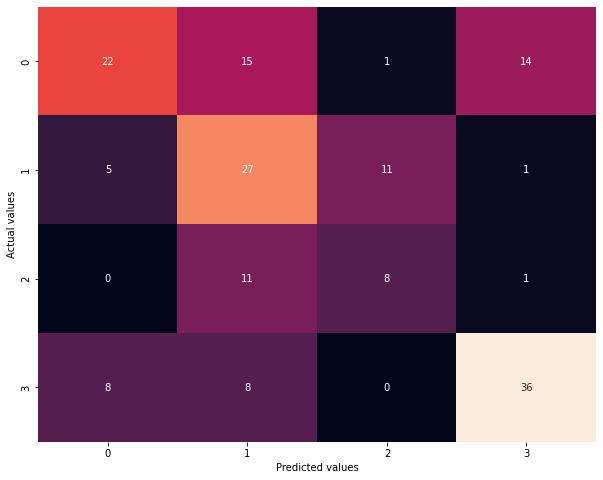

In [ ]:
import seaborn as sns
import pandas as pd
cm3 = pd.DataFrame(confusion_matrix(y_test, clas))
plt.figure(figsize = (10, 8))
sns.heatmap(cm3, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
filename = "/content/drive/My Drive/DataSets/audio_speech_actors_01-24/Actor_04/03-01-03-01-02-02-04.wav"
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
f=np.expand_dims(features,axis=2)
pred=tm.predict(f)
clas=np.argmax(pred,axis=1)
result=int(clas-1)
print("result :",em[result])

result : angry


# ***FORTH MODEL***

Four Relu and one Softmax

Sparse Categorial CrossEntropy

In [ ]:
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

sm = Sequential()

sm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm.add(Activation('relu'))
sm.add(Dropout(0.1))
sm.add(MaxPooling1D(pool_size=(8)))

sm.add(Conv1D(128, 5,padding='same',))                  #2
sm.add(Activation('relu'))
sm.add(MaxPooling1D(pool_size=(8)))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #3
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #4
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Flatten())
sm.add(Dense(8))                                        #5                     
sm.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005,epsilon=None,rho=0.9,decay=0.0)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
sm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_38 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_28 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_39 (Activation)  (None, 22, 128)           0         
                                                     

In [ ]:
sm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
smhistory=sm.fit(x_traincnn, y_train, batch_size=25, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 3.5676 - accuracy: 0.1905 - val_loss: 1.4606 - val_accuracy: 0.2619
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 2.1204 - accuracy: 0.2996 - val_loss: 1.8785 - val_accuracy: 0.3095
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 1.9535 - accuracy: 0.3056 - val_loss: 1.4932 - val_accuracy: 0.3095
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 1.9393 - accuracy: 0.2917 - val_loss: 1.4484 - val_accuracy: 0.3095
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 1.7532 - accuracy: 0.3274 - val_loss: 1.3519 - val_accuracy: 0.4345
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 1.6940 - accuracy: 0.3373 - val_loss: 1.4347 - val_accuracy: 0.3095
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 1.6195 - accuracy: 0.3433 - val_loss: 1.2813 - val_accuracy: 0.3690
Epoch 8/100


In [ ]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

6/6 [==============================] - 0s 5ms/step - loss: 0.9856 - accuracy: 0.5655
Restored model, accuracy: 56.55%


In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
des=sm.predict(x_testcnn)
obj=np.argmax(des,axis=1)
#print(classification_report(y_test,obj))
#print(confusion_matrix(y_test,obj))
print ('Accuracy:', accuracy_score(y_test, obj))
print ('F1 score:', f1_score(y_test, obj,average='weighted'))
print ('Recall:', recall_score(y_test, obj,average='weighted'))
print ('Precision:', precision_score(y_test, obj,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, obj))
print ('\n confussion matrix:\n',confusion_matrix(y_test, obj))

Accuracy: 0.5654761904761905
F1 score: 0.5387239033544453
Recall: 0.5654761904761905
Precision: 0.5215404096421178

 clasification report:
               precision    recall  f1-score   support

         0.0       0.53      0.65      0.59        52
         1.0       0.46      0.59      0.52        44
         3.0       0.00      0.00      0.00        20
         4.0       0.76      0.67      0.71        52

    accuracy                           0.57       168
   macro avg       0.44      0.48      0.46       168
weighted avg       0.52      0.57      0.54       168


 confussion matrix:
 [[34  7  0 11]
 [16 26  2  0]
 [ 1 19  0  0]
 [13  4  0 35]]


In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)
res = perf_measure(y_test, obj)
print("TP",res[0])
print("FP",res[1])
print("TN",res[2])
print("FP",res[3])


TP 26
FP 30
TN 34
FP 30


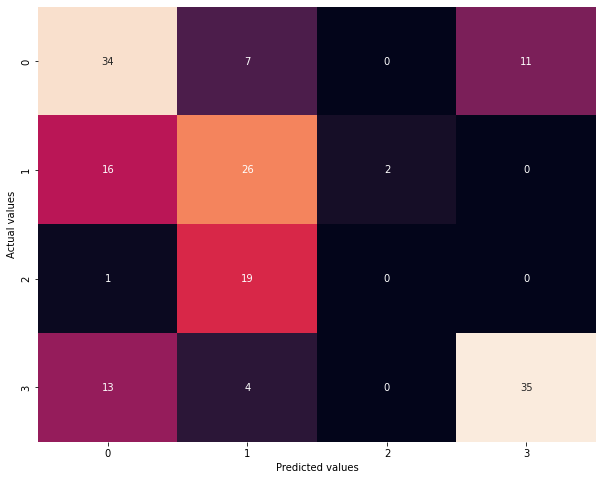

In [ ]:
import seaborn as sns
import pandas as pd
cm4 = pd.DataFrame(confusion_matrix(y_test, obj))
plt.figure(figsize = (10, 8))
sns.heatmap(cm4, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
filename = "/content/drive/My Drive/DataSets/audio_speech_actors_01-24/Actor_23/03-01-01-01-02-02-23.wav"
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
f=np.expand_dims(features,axis=2)
des=sm.predict(f)
obj=np.argmax(des,axis=1)
result=int(obj)-1
print("result :",em[result])

result : angry
